In [421]:
import pandas as pd 
import numpy as np 
import nltk
import nltk.corpus
from nltk.corpus import words
from nltk.tokenize import WhitespaceTokenizer
import matplotlib.pyplot as plt
import random

from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Preprocessing Dataset

In [422]:
data_path = '/Users/abdoulabdillahi/Desktop/CSC 680/Final_project/chat_slang/data/slang.csv'
df = pd.read_csv(data_path)

In [423]:
df.shape

(3357, 3)

In [424]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,acronym,expansion
0,2day,today
1,2m2h,too much too handle
2,2moro,tomorrow
3,2nite,tonight
4,4eae,for ever and ever


In [425]:
# Generate text with acronyms 
def generate_text_with_acronyms(df, num_sentences=5, num_acronyms_to_use=5):
    sentences = []
    for _ in range(num_sentences):
        sentence = []
        # Randomly choose acronyms and use them in the sentence
        sampled_acronyms = random.sample(range(len(df)), min(num_acronyms_to_use, len(df)))
        for idx in sampled_acronyms:
            acronym, expansion = df.iloc[idx]['acronym'], df.iloc[idx]['expansion']
            # Construct the sentence using the acronym and its expansion
            sentence.append(random.choice([acronym, expansion]))
        sentences.append(" ".join(sentence))
    return " ".join(sentences)

In [426]:
#generate_text_with_acronyms(df, 2,7)

In [427]:
# creating a new column to generate synthetic text 
df['informal_text'] = df.apply( lambda row:generate_text_with_acronyms(df, num_sentences=3, num_acronyms_to_use=5), axis=1)

In [428]:
df.head(10)

,acronym,expansion,informal_text
0,2day,today,wsm iiwy ilm just wait and see itys military police member of parliament get with it only joking i think i am in love with you wywh women over mates count your blessings wtft hope that helps how the hell nagl
1,2m2h,too much too handle,british national party ngu got the t shirt va ild ilml erotic role play national hockey league plr myb amaa silent but deadly ydmt nak lotro
2,2moro,tomorrow,mltr oh my god i totally agree the devil wears prada toilet paper town portal ybs alg pc wst you crack me up national football league problem exists between keyboard and chair advanced research projects agency network brt god save the queen
3,2nite,tonight,aisi wylasomwtc ptw iwik laugh in head i get you gfa no middle name ltm pacific north west wst ial pints and quarts please and thank yous hspda lts
4,4eae,for ever and ever,out of office lyr thank god it is over cracked or pirate software date of birth wtk what do you think tgod vcr rbtl radio telephone operator oyg tbh high definition multimedia interface what can i say
5,aaf,as a friend,tbbh parts per million marriage of convenience my own creation thread from hell itk est please isp male assigned at birth ylyl uv iawtp cua wpm yellow dog linux
6,aar,at any rate,i love you so damn much mm pomo he could do a job for us iow peanut butter and jelly fyp wom may god bless you in fond memory jafa national hockey league puv nnito lyl
7,aayf,as always your friend,myb this thread is useless without pictures poor life decision plu talk to you ma sbi dmal bffl i am not a lawyer or something like that ttjasi not a problem congratulations i do not judge rml
8,abd,already been done,i do not get hashtag phrases i do not get his or her point i do not generally hate people vbd not much you ykylm mildly fat chick microsoft foundation classes laughing in my head ac luser attitude readjustment tool map hack i do not know what you mean...
9,ack,acknowledge,ttutt much clown love male to female iyh search engine optimization nw passed out drunk ppu taylor gang or die bmth bfwb real time odd future wolf gang kill them all very nice shot new without tags


In [429]:
# Tokenisation
tokenizer = WhitespaceTokenizer()
def tokenise(text):
    return tokenizer.tokenize(str(text))

df['tokenized_text'] = df['informal_text'].apply(lambda x: tokenise(x))

In [430]:
df.head()

,acronym,expansion,informal_text,tokenized_text
0,2day,today,wsm iiwy ilm just wait and see itys military police member of parliament get with it only joking i think i am in love with you wywh women over mates count your blessings wtft hope that helps how the hell nagl,"[wsm, iiwy, ilm, just, wait, and, see, itys, military, police, member, of, parliament, get, with, it, only, joking, i, think, i, am, in, love, with, you, wywh, women, over, mates, count, your, blessings, wtft, hope, that, helps, how, the, hell, nagl]"
1,2m2h,too much too handle,british national party ngu got the t shirt va ild ilml erotic role play national hockey league plr myb amaa silent but deadly ydmt nak lotro,"[british, national, party, ngu, got, the, t, shirt, va, ild, ilml, erotic, role, play, national, hockey, league, plr, myb, amaa, silent, but, deadly, ydmt, nak, lotro]"
2,2moro,tomorrow,mltr oh my god i totally agree the devil wears prada toilet paper town portal ybs alg pc wst you crack me up national football league problem exists between keyboard and chair advanced research projects agency network brt god save the queen,"[mltr, oh, my, god, i, totally, agree, the, devil, wears, prada, toilet, paper, town, portal, ybs, alg, pc, wst, you, crack, me, up, national, football, league, problem, exists, between, keyboard, and, chair, advanced, research, projects, agency, netw..."
3,2nite,tonight,aisi wylasomwtc ptw iwik laugh in head i get you gfa no middle name ltm pacific north west wst ial pints and quarts please and thank yous hspda lts,"[aisi, wylasomwtc, ptw, iwik, laugh, in, head, i, get, you, gfa, no, middle, name, ltm, pacific, north, west, wst, ial, pints, and, quarts, please, and, thank, yous, hspda, lts]"
4,4eae,for ever and ever,out of office lyr thank god it is over cracked or pirate software date of birth wtk what do you think tgod vcr rbtl radio telephone operator oyg tbh high definition multimedia interface what can i say,"[out, of, office, lyr, thank, god, it, is, over, cracked, or, pirate, software, date, of, birth, wtk, what, do, you, think, tgod, vcr, rbtl, radio, telephone, operator, oyg, tbh, high, definition, multimedia, interface, what, can, i, say]"


In [431]:
# Define a replace informal function to formal 
def replace_informal(tokens, informal):
    tokens = [informal.get(token.lower(), token) for token in tokens]
    return ' '.join(tokens)

In [432]:
# apply replace informal function to the
def formalize_dataframe(df, informal):
    df['formal_text'] = df['tokenized_text'].apply(lambda x: replace_informal(x, informal))
    return df

In [433]:
# Mapping dictionnary from acronyms and their expansion 
informal_to_formal = dict(zip(df['acronym'], df['expansion']))

In [434]:
informal_to_formal

{'2day': 'today',
 '2m2h': 'too much too handle',
 '2moro': 'tomorrow',
 '2nite': 'tonight',
 '4eae': 'for ever and ever',
 'aaf': 'always and forever',
 'aar': 'at any rate',
 'aayf': 'as always your friend',
 'abd': 'already been done',
 'ack': 'acknowledge',
 'adih': 'another day in hell',
 'adn': 'any day now',
 'adr': 'all due respect',
 'aeap': 'as early as possible',
 'afaic': 'as far as i am concerned',
 'afaik': 'as far as i know',
 'aka': 'also known as',
 'ama': 'ask me anything against medical advice',
 'ambw': 'all my best wishes',
 'aml': 'all my love',
 'aota': 'all of the above',
 'asap': 'as soon as possible',
 'atb': 'all the best',
 'ateotd': 'at the end of the day',
 'atm': 'at the moment automated teller machine ',
 'awol': 'absent without leave',
 'aydy': 'are you done yet',
 'ayec': 'at your earliest convenience',
 'ayor': 'at your own risk',
 'ays': 'are you serious',
 'aysos': 'are you stupid or something',
 'ayt': 'are you there',
 'b/c': 'because',
 'b4': 'be

In [435]:
df= formalize_dataframe(df, informal_to_formal)

In [436]:
df.head()

,acronym,expansion,informal_text,tokenized_text,formal_text
0,2day,today,wsm iiwy ilm just wait and see itys military police member of parliament get with it only joking i think i am in love with you wywh women over mates count your blessings wtft hope that helps how the hell nagl,"[wsm, iiwy, ilm, just, wait, and, see, itys, military, police, member, of, parliament, get, with, it, only, joking, i, think, i, am, in, love, with, you, wywh, women, over, mates, count, your, blessings, wtft, hope, that, helps, how, the, hell, nagl]",woman seeking man if i were you i lige m just wait and see i told you so military police member of parliament get where in the hell information technology only joking i think i ante meridiem amplitude modulation in love where in the hell you wish yo...
1,2m2h,too much too handle,british national party ngu got the t shirt va ild ilml erotic role play national hockey league plr myb amaa silent but deadly ydmt nak lotro,"[british, national, party, ngu, got, the, t, shirt, va, ild, ilml, erotic, role, play, national, hockey, league, plr, myb, amaa, silent, but, deadly, ydmt, nak, lotro]",british national party never give up got the t shirt various artists ich liebe dich i love my life erotic role play national hockey league private label rights mind your business ask me almost anything silent but deadly you do not mean that nursing a...
2,2moro,tomorrow,mltr oh my god i totally agree the devil wears prada toilet paper town portal ybs alg pc wst you crack me up national football league problem exists between keyboard and chair advanced research projects agency network brt god save the queen,"[mltr, oh, my, god, i, totally, agree, the, devil, wears, prada, toilet, paper, town, portal, ybs, alg, pc, wst, you, crack, me, up, national, football, league, problem, exists, between, keyboard, and, chair, advanced, research, projects, agency, netw...",multiple long term relationships other half miss you god i totally agree the devil wears prada toilet paper town portal you will be sorry are not life grand politically correct personal computer we are still friends you crack me up national football l...
3,2nite,tonight,aisi wylasomwtc ptw iwik laugh in head i get you gfa no middle name ltm pacific north west wst ial pints and quarts please and thank yous hspda lts,"[aisi, wylasomwtc, ptw, iwik, laugh, in, head, i, get, you, gfa, no, middle, name, ltm, pacific, north, west, wst, ial, pints, and, quarts, please, and, thank, yous, hspda, lts]",as i see it would you like a saucer of milk with that comment play to win professional time waster i wish i knew laugh in head i get you grenade free america no middle name laughing to myself pacific north west we are still friends i are not laughing ...
4,4eae,for ever and ever,out of office lyr thank god it is over cracked or pirate software date of birth wtk what do you think tgod vcr rbtl radio telephone operator oyg tbh high definition multimedia interface what can i say,"[out, of, office, lyr, thank, god, it, is, over, cracked, or, pirate, software, date, of, birth, wtk, what, do, you, think, tgod, vcr, rbtl, radio, telephone, operator, oyg, tbh, high, definition, multimedia, interface, what, can, i, say]",out of office love you really thank god information technology is over cracked or pirate software date of birth want to know what do you think taylor gang or die video cassette recorder read between the lines radio telephone operator oh your god to be...


# Data Transformation and Label Assignment 

In [437]:
# Creating informal dataframe 
informal_df = pd.DataFrame({'Text': df['informal_text'], 'Label': 0})

In [438]:
informal_df.head()

,Text,Label
0,wsm iiwy ilm just wait and see itys military police member of parliament get with it only joking i think i am in love with you wywh women over mates count your blessings wtft hope that helps how the hell nagl,0
1,british national party ngu got the t shirt va ild ilml erotic role play national hockey league plr myb amaa silent but deadly ydmt nak lotro,0
2,mltr oh my god i totally agree the devil wears prada toilet paper town portal ybs alg pc wst you crack me up national football league problem exists between keyboard and chair advanced research projects agency network brt god save the queen,0
3,aisi wylasomwtc ptw iwik laugh in head i get you gfa no middle name ltm pacific north west wst ial pints and quarts please and thank yous hspda lts,0
4,out of office lyr thank god it is over cracked or pirate software date of birth wtk what do you think tgod vcr rbtl radio telephone operator oyg tbh high definition multimedia interface what can i say,0


In [439]:
formal_df = pd.DataFrame({'Text': df['formal_text'], 'Label':1})

In [440]:
formal_df.head()

,Text,Label
0,woman seeking man if i were you i lige m just wait and see i told you so military police member of parliament get where in the hell information technology only joking i think i ante meridiem amplitude modulation in love where in the hell you wish yo...,1
1,british national party never give up got the t shirt various artists ich liebe dich i love my life erotic role play national hockey league private label rights mind your business ask me almost anything silent but deadly you do not mean that nursing a...,1
2,multiple long term relationships other half miss you god i totally agree the devil wears prada toilet paper town portal you will be sorry are not life grand politically correct personal computer we are still friends you crack me up national football l...,1
3,as i see it would you like a saucer of milk with that comment play to win professional time waster i wish i knew laugh in head i get you grenade free america no middle name laughing to myself pacific north west we are still friends i are not laughing ...,1
4,out of office love you really thank god information technology is over cracked or pirate software date of birth want to know what do you think taylor gang or die video cassette recorder read between the lines radio telephone operator oh your god to be...,1


In [441]:
# combined the two Dataframe 
combined_df = pd.concat([informal_df, formal_df], ignore_index=True)

In [442]:
combined_df.head()

,Text,Label
0,wsm iiwy ilm just wait and see itys military police member of parliament get with it only joking i think i am in love with you wywh women over mates count your blessings wtft hope that helps how the hell nagl,0
1,british national party ngu got the t shirt va ild ilml erotic role play national hockey league plr myb amaa silent but deadly ydmt nak lotro,0
2,mltr oh my god i totally agree the devil wears prada toilet paper town portal ybs alg pc wst you crack me up national football league problem exists between keyboard and chair advanced research projects agency network brt god save the queen,0
3,aisi wylasomwtc ptw iwik laugh in head i get you gfa no middle name ltm pacific north west wst ial pints and quarts please and thank yous hspda lts,0
4,out of office lyr thank god it is over cracked or pirate software date of birth wtk what do you think tgod vcr rbtl radio telephone operator oyg tbh high definition multimedia interface what can i say,0


In [443]:
combined_df

,Text,Label
0,wsm iiwy ilm just wait and see itys military police member of parliament get with it only joking i think i am in love with you wywh women over mates count your blessings wtft hope that helps how the hell nagl,0
1,british national party ngu got the t shirt va ild ilml erotic role play national hockey league plr myb amaa silent but deadly ydmt nak lotro,0
2,mltr oh my god i totally agree the devil wears prada toilet paper town portal ybs alg pc wst you crack me up national football league problem exists between keyboard and chair advanced research projects agency network brt god save the queen,0
3,aisi wylasomwtc ptw iwik laugh in head i get you gfa no middle name ltm pacific north west wst ial pints and quarts please and thank yous hspda lts,0
4,out of office lyr thank god it is over cracked or pirate software date of birth wtk what do you think tgod vcr rbtl radio telephone operator oyg tbh high definition multimedia interface what can i say,0
...,...,...
6709,original sound track where no one has gone before never let you go this is not a legal opinion simple matter of programming american telephone and telegraph time out be decided really do not care do not take your tears in my eyes rest of the world off...,1
6710,kill me now what you want all in one masai barefoot technology the one that got away american eagle love you forever what was i thinking straight out of camera sweet dreams secure digital significant other shout out drunk non committal make out i wan...,1
6711,not miss you type looking for i love miss you life tonight some mothers do have them post potter depression blonde brunette redhead key performance indicator information technology not going time out happen in my humble opinion sorry for late reply ne...,1
6712,as i understand it nine inch nails day of defeat no pun intended cult of the dead cow crudely drawn cock wash miss you mouth out where in the hell soap joint photographic experts group image file format i know how you feel body modification ezine do s...,1


In [444]:
len(combined_df)

6714

In [445]:
# shuffle the DataFrame 
dframe = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [446]:
dframe.head()

,Text,Label
0,nfs in terms of sula bhl8 take my advice tma vlsi wish i was with you internet information services rps sab sos ministry of transport test for car safety dwbh quality value convenience,0
1,windows live messenger does not matter deep and meaningful out of the box wash miss you mouth out where in the hell soap artificial intelligence as if time out do list most annoying people on the internet player versus environment cisco certified int...,1
2,tgit escape the fate what is wrong with you what is up with you i will love you forever let me take a look keep the faith istg tgp thought you might be interested digital signal processing dmi nagl utp sase,0
3,miss you life is great or good none of the above at the moment automated teller machine thumbnail gallery post long tears in my eyes no see why would you do that laughing where in the hell passion grenade free america attention to detail i will be ba...,1
4,keep mum best friends forever and ever best friends for all eternity would you like a saucer of milk with that comment rank has i think or thought so privileges too much tuna not even going to lie whatever normal for norfolk see you later bring your o...,1


# Feature Extraction and Training the model 

In [447]:
vectorizer = TfidfVectorizer(max_features=1500)
X = vectorizer.fit_transform(dframe['Text'])   # feature of the dataset 
y = dframe['Label']                                             # targets or labels 

In [448]:
# Split the data into training and testing the model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [449]:
# Model Training 
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [450]:
# Model Evaluation 
predictions = model.predict(X_test)

In [451]:
# Generating classification report 
report = classification_report(y_test, predictions, output_dict=True)

In [452]:
df_report = pd.DataFrame(report).transpose()

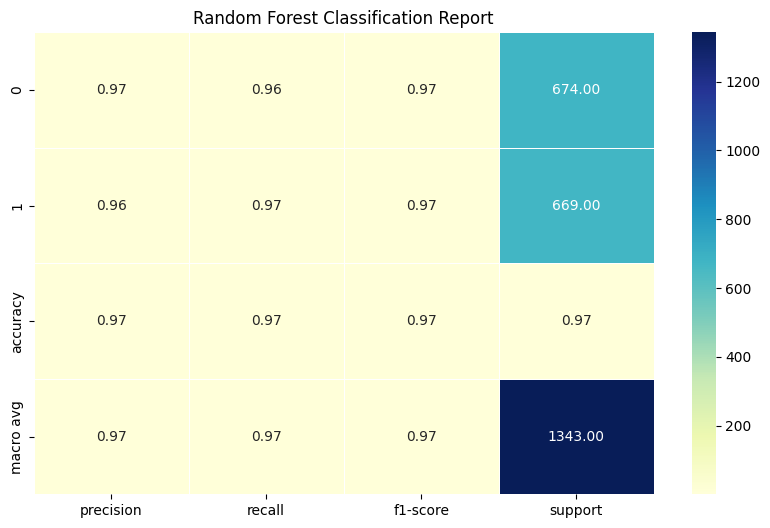

In [453]:
plt.figure(figsize=(10,6))
sns.heatmap(df_report.iloc[:-1, :].astype(float), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Random Forest Classification Report")
plt.show()

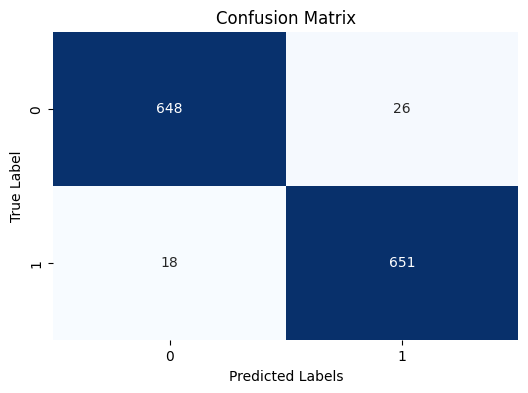

In [454]:
# Evaluate the model using Confusion Matrix 
conf_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [455]:
accuracy1= accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy1:.2f}\n")

Accuracy: 0.97



# Second Model Logistic Regreesion 

In [456]:
# Train model 
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [457]:
# Make prediction 
y_pred = model2.predict(X_test)

In [458]:
report2 = classification_report(y_test, y_pred, output_dict=True)

In [459]:
df_report2 = pd.DataFrame(report2).transpose()

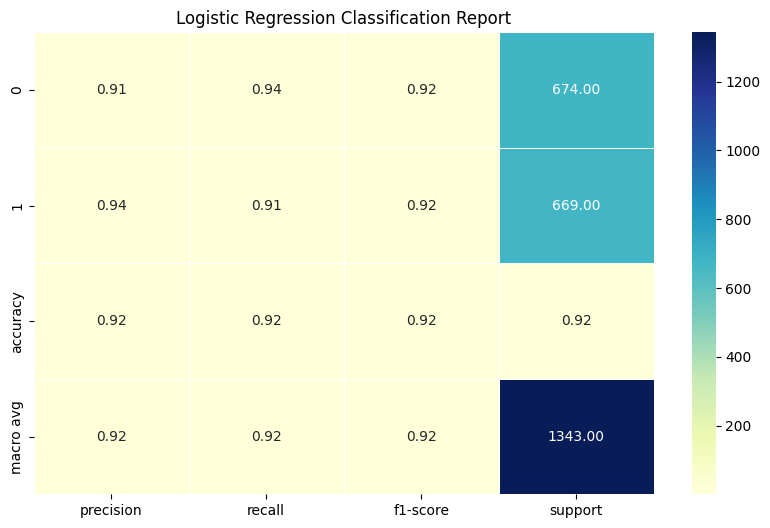

In [460]:
plt.figure(figsize=(10,6))
sns.heatmap(df_report2.iloc[:-1, :].astype(float), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Logistic Regression Classification Report")
plt.show()

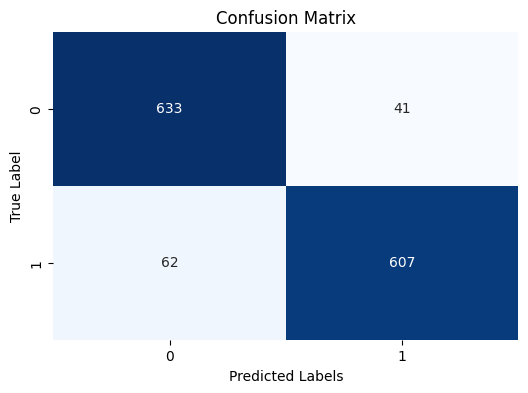

In [461]:
# Evaluate the model using Confusion Matrix 
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [462]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

Accuracy: 0.92

